<a href="https://colab.research.google.com/github/Mangalis0/regression_team_2/blob/master/Faatimah_'fresh'_notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1Tkiy1Gvc4Ce0L3qiHKUAvkttcWkGMU8O)

                                                                      Image source: https://vc4a.com/ventures/sendy-limited/





# **Sendy Explore Competition - Regression Analysis**

____

Team 2 - Mangaliso Samuel Makhoba, Bryan Green, Michael Ilic, Lawrence Hlapa, Faatimah Mansoor 

**The structure of this notebook is as follows:**

[**1 Introduction**](#Introduction)




[**2 Body**](#Body)

  [2.1 Import modules](#Import_modules)

  [2.2 Import dataset](#Import_dataset)

  [2.3 EDA](#EDA)
  
  [3.4 Data preprocessing](#Data_preprocessing)

  [2.5 Modelling](#Modelling)

  [2.6 Model selection](#Model_selection)

  [2.7 Using model on Test](#Using_model_on_Test)

  [2.8 Functions to be placed in API](#Functions_to_be_placed_in_API)

[**3 Conclusion**](#Conclusion)

[**4 References and links**](#References_and_links)


##**1 Introduction**
<a id="Introduction"></a>

Sendy is a logistic company in Kenya. The aim of this project is to build a regression model for Sendy which can accurately predict delivery time, from the time a package is picked up to its arrival at the final destination.

To build this model, the Train dataset and the riders dataset will used. Regression models will be trained, and the most suitable will be selected. This model will then be used to predict delivery time for the test dataset 

**Variable to be predicted(y):** Time_from_Pickup_to_Arrival





##**2 Body**
<a id="Body"></a>

###2.1 Import modules
<a id="Import_modules"></a>

In [2]:
#import modules 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import math

from datetime import datetime

###2.2 Import dataset
<a id="Import_dataset"></a>

In [3]:
#if using google colab,run this cell to import data 
train = pd.read_csv('/content/Train.csv') #training set
test = pd.read_csv('/content/Test.csv') #testing set(y variable to be predicted)
riders = pd.read_csv('/content/Riders.csv') #riders info
variable_def = pd.read_csv('/content/VariableDefinitions.csv')
sample = pd.read_csv('/content/SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model

FileNotFoundError: [Errno 2] File /content/Train.csv does not exist: '/content/Train.csv'

In [4]:
#if using jupyter notebook, run this cell to import data
train = pd.read_csv('Train.csv') #training set
test = pd.read_csv('Test.csv') #testing set(y variable to be predicted)
riders = pd.read_csv('Riders.csv') #riders info
variable_def = pd.read_csv('VariableDefinitions.csv')
sample = pd.read_csv('SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model

###2.3 EDA
<a id="EDA"></a>

Let's take a look at the data

**Variable** **definitions**

In [5]:
variable_def

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


**Riders EDA**

In [6]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


'Age' here refers to the number of days since the rider delivered their first order

In [7]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [8]:
riders.isnull().sum(axis = 0) #number of nulls per column 

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

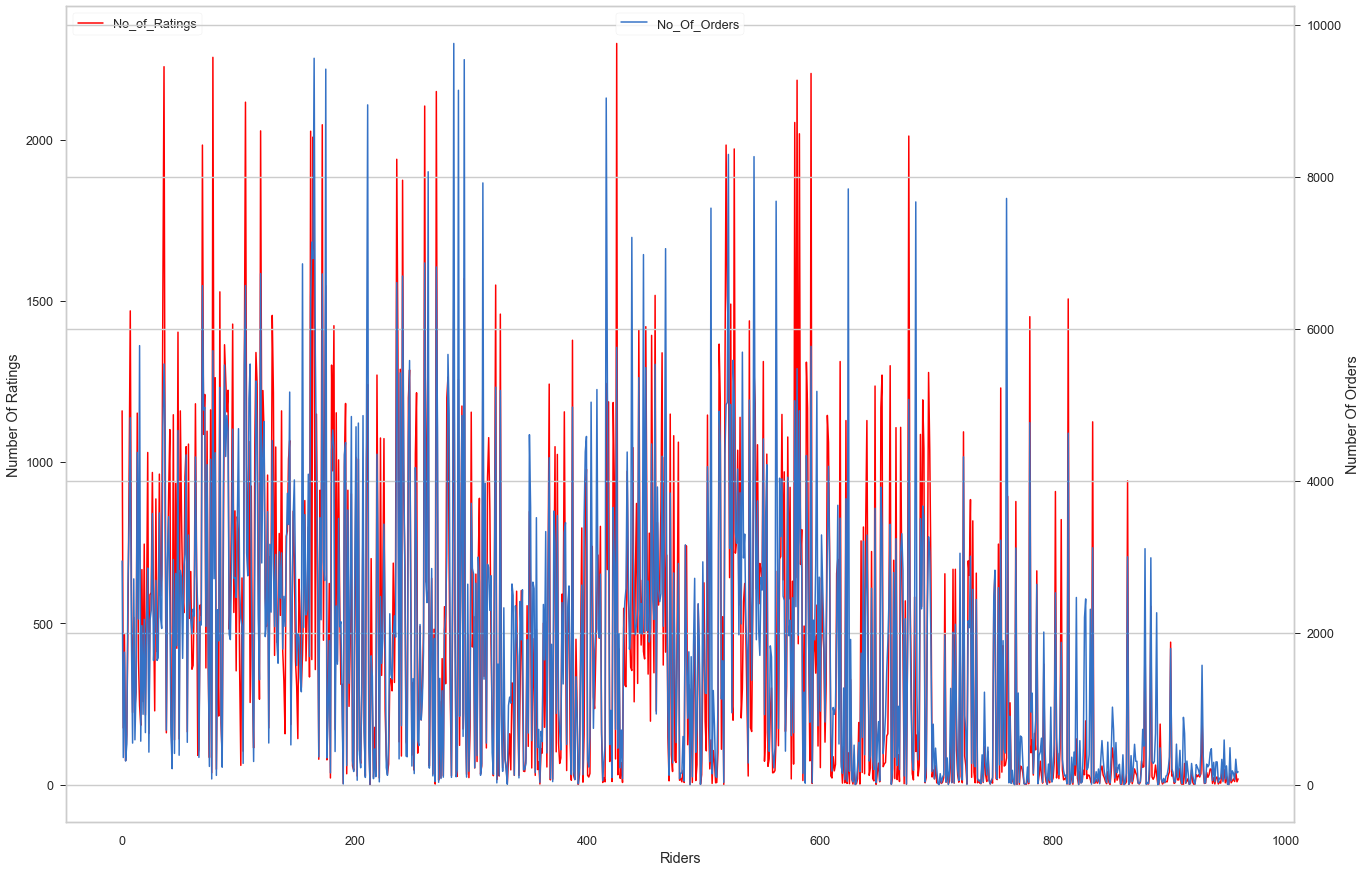

In [9]:
# Riders Number Of Ratings Vs Number Of Orders

from matplotlib import rc

rc('mathtext', default='regular')
# Create Empty figure
build = plt.figure(figsize=(22,15))

# Split Figure To Allow Two Sets Of Y Axes
axes1 = build.add_subplot(111)

# Plot The First Line On Its Axis
axes1.plot(np.arange(len(riders["No_of_Ratings"])), riders["No_of_Ratings"], '-', label = "No_of_Ratings", color='red')

# Create Second Y Axis And Plot Second Line
axes2 = axes1.twinx()
axes2.plot(np.arange(len(riders["No_Of_Orders"])), riders["No_Of_Orders"], '-', label = "No_Of_Orders")

# Add Legends For Each Axis
axes1.legend(loc=2)
axes2.legend(loc=9)

axes1.grid()

# Set Labels Of Axes
axes1.set_xlabel("Riders")
axes1.set_ylabel("Number Of Ratings")
axes2.set_ylabel("Number Of Orders")
plt.show()

**Train EDA**

In [10]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In train, the categorical variables are Vehicle type(although there is only one- bike), Platform type and Personal or Business, refering to the business type. Temperature is a ratio variable. In this data, day is considered to be a categorical variable, however, it should be represented as a cyclical variable

In [11]:
print('train contains')
print('No. of rows:', train.shape[0])
print('No. of columns:', train.shape[1])

train contains
No. of rows: 21201
No. of columns: 29


In [12]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [14]:
train.isnull().sum(axis = 0) #number of nulls per column

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

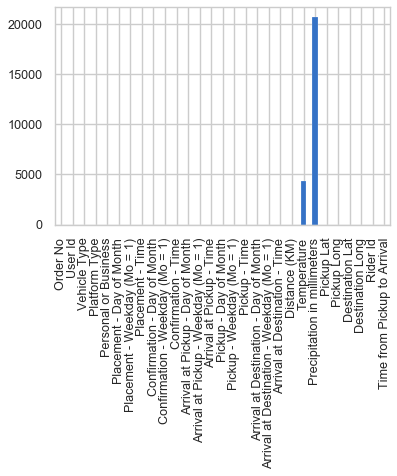

In [15]:
# Bar chart showing the number of missing values in each column
train.isnull().sum().plot(kind='bar')

In [16]:
def percentage_missing_values(input_df, column_name):

  missing_col_values = sum(input_df[column_name].isnull())

  per_col_missing = round(missing_col_values / len(input_df[column_name]) * 100, 2)

  return print(column_name, ":" ,per_col_missing, "percentage of the data is missing")

In [17]:
percentage_missing_values(train, "Temperature")

Temperature : 20.59 percentage of the data is missing


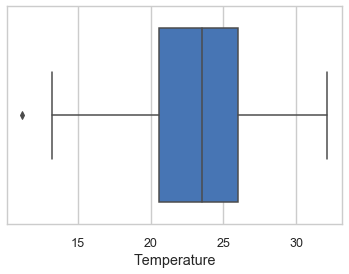

In [18]:
#understanding temperature data
sns.boxplot(train['Temperature'])
plt.show()

20.59% of 'Temperature' data is missing. This will need to be imputed either with the mean, mode or median. The mean is 23.25° while the median is 23.5°

In [19]:
percentage_missing_values(train, "Precipitation in millimeters")

Precipitation in millimeters : 97.4 percentage of the data is missing


Thus, the precipitation column will need to be dropped 

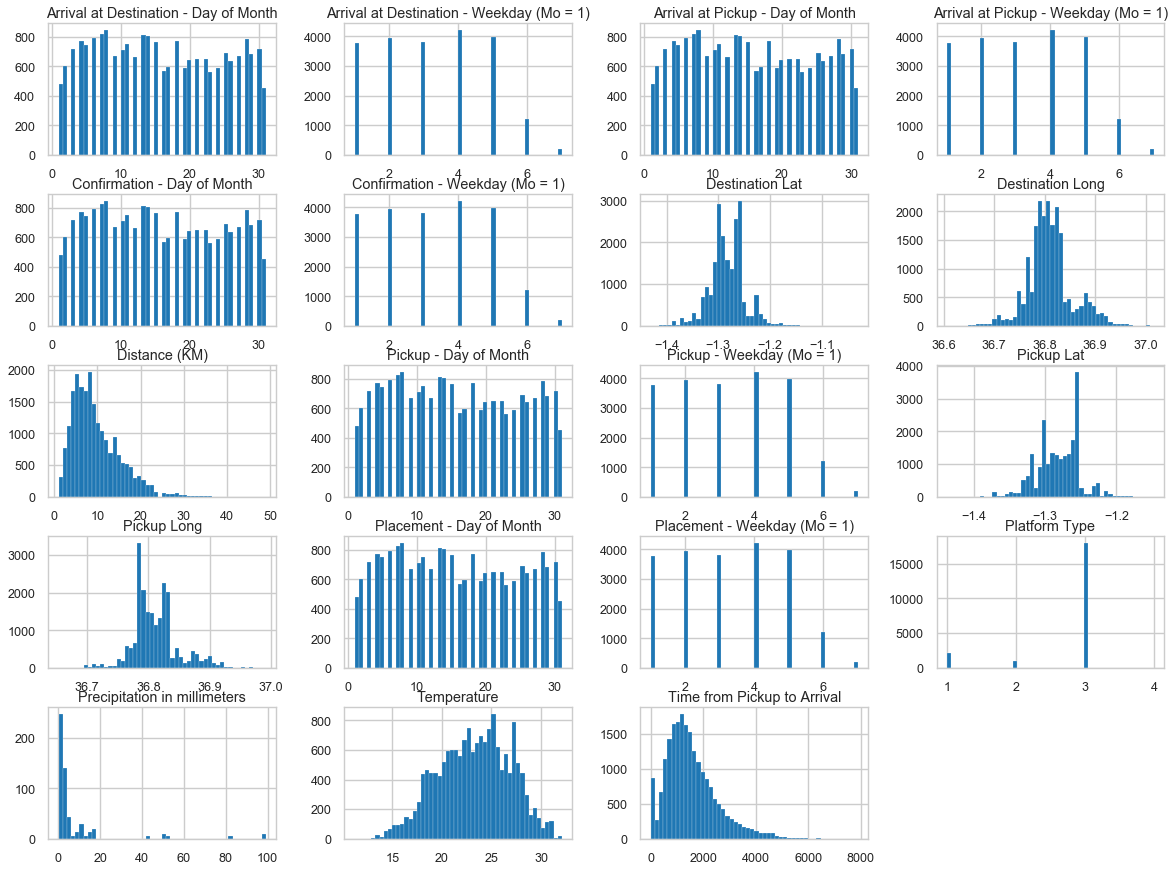

In [20]:
#plotting distributions of all the variables in train
train.hist(bins=50, figsize=(20,15), color = 'tab:blue')
plt.show()

The figure above shows us the distribution of each of the variables in train, inclduing the y variable(Time from pickup to arrival). Looking at the mean and mode of each of the variables, it was assumed that the data was normally distributed. However, it can be seen that the data is skewed for variables such as Distance. 

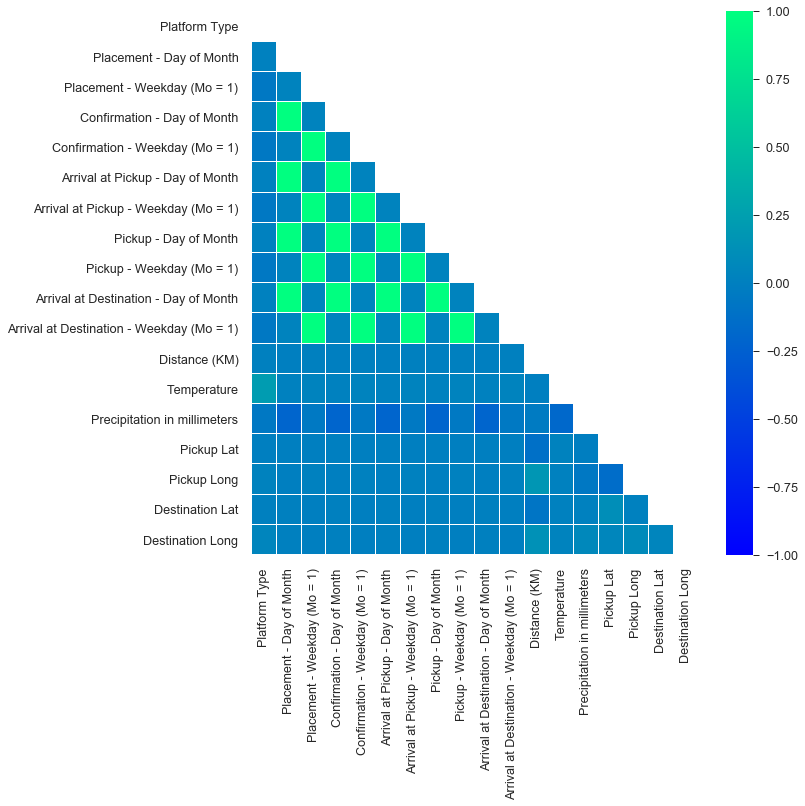

In [21]:
#Plotting correlation heat map for predictor variable in train 
train_variables = train.drop(['Time from Pickup to Arrival'], axis =1)
train_kor = train_variables.corr()

# Mask top half of matrix as it contains redunant info
mask = np.zeros_like(train_kor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the matrix
plt.figure(figsize=(10,10))
sns.heatmap(train_kor, vmin=-1, vmax=1, cmap='winter', linewidth=0.1, mask = mask);

In [22]:
#visualising pick-up locations on a street map 
px.scatter_mapbox(train, 
                     lat='Pickup Lat', 
                     lon='Pickup Long',  
                     color = 'Time from Pickup to Arrival',
                     color_continuous_scale = 'Blues', 
                     mapbox_style = 'open-street-map',
                     title = 'Pick-up location')

TypeError: scatter_mapbox() got an unexpected keyword argument 'mapbox_style'

The above visual gives us a sense of how the pick-up locations are distributed geographically.

**Test data**

In [23]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [24]:
print('test contains')
print('No. of observations:', test.shape[0])
print('No. of features:', test.shape[1])

test contains
No. of observations: 7068
No. of features: 25


In [25]:
set(train.columns) - set(test.columns)

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Time from Pickup to Arrival'}

We must drop the above before moving on

In [26]:
set(test.columns) - set(train.columns) # just to be sure

set()

In [27]:
placement = [col for col in train.columns if ((col[:len('Placement')] == 'Placement') or (col[:len('Confirmation')] == 'Confirmation')) ]
placement

['Placement - Day of Month',
 'Placement - Weekday (Mo = 1)',
 'Placement - Time',
 'Confirmation - Day of Month',
 'Confirmation - Weekday (Mo = 1)',
 'Confirmation - Time']

The placement time of the order is irrelevant to the target. The main concern of the problem statement is the period between pickup and arrival. When the order was placed, has no bearing whatsoever in effect to that period. So, we are going to drop everything concerning placement.

Furthermore, 'Confirmation' columns, with the same argument, must be dropped.

###2.4 Data preprocessing
<a id="Data_preprocessing"></a>

In [28]:
xdata = train.drop(columns=['Time from Pickup to Arrival', 'User Id', 'Order No', 
'Arrival at Destination - Day of Month',
'Arrival at Destination - Time',
'Arrival at Destination - Weekday (Mo = 1)'] + placement)

# "Arrival at Destination...", that's what we trying to predict - We have 'Time from Pickup to Arrival' 



X = xdata.copy() # Just for insurance so that whatever changes we make, do not affect the original data
X = X.merge(riders, how='left', on=['Rider Id']).drop(columns=['Rider Id'])

f_testx = test.merge(riders, how='left', on=['Rider Id']).drop(columns=['User Id', 'Order No', 'Rider Id'] + placement)

# We just want to keep essential columns

In [29]:
y = train['Time from Pickup to Arrival'] # The target

Let's confirm if columns on train are those on test

In [30]:
set(f_testx.columns) == set(X.columns)

True

We will run our cleaner function: It mostly just converts the columns: There will not be any data leakage because there won't be any imputation or aggregation

We may have to edit our function for general test with fewer data, such as one observation. The test_cleaner function will follow this.

The test_cleaner, learns from this, cleaner, and adjusts itself for the test. That would be cool. No, WE learn from the Cleaner Function and program the cleaner funtion to 
perfom the transformation that were already done on the train in the test.

Now things are about to get ugly( or clean, depending on how you look at it...). The below function is a cleaner that prepares the datasets for modelling 

In [32]:
### START FUNCTION
def cleaner(input_df, nullthreshold=0.9, correlation_thresh=0.95, day_of_month_cols=[], day_of_week_cols=[]):
    input_dfc = input_df.copy()
    

    #########################################################################################
    # The Code below drops columns that have null values exceeding threshold and Columns that have ONLY one value
    for col in input_df.columns:
        if (sum(input_df[col].isnull())/len(input_df[col]) > nullthreshold) or (len(input_df[col].unique()) == 1):
            input_dfc.drop(columns=[col], inplace=True) 
            
    #########################################################################################

    #########################################################################################
    #   This code converts time given by am and pm into seconds then applies cosine and sine
    #   This is done because hours and days of the week, and days of the month are cyclic.
    #   That is, for example, if 1 represents Monday, as in our data, the model must understand that, 
    #   Day 7, that is Sunday, is closer to day 1, than day 3 is, which is Wednesday. 
    def time_to_seconds(input_df):
        input_dfc = input_df.copy()

        from datetime import datetime

        for time_col in [col for col in input_df.columns if 'Time' in [col[-4:]]]:

            # Here, we convert the time to seconds, from 00:00am instead of seperating the data into
            # hours, minutes and seconds or dropping either one of them because we may lose data. 
            # This is essential because there are deliveries made in seconds. 

            # The sine and cosine functions are of the form: sin(seconds*2*pi/86400), cosine likewise.
            # Just as the complete circle revolution period is 2*pi, the period of a day in seconds is 86400

            input_dfc[time_col + '_sin(seconds)'] = \
            input_df[time_col].apply(lambda time: np.sin(
                (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)).total_seconds() \
                * (2.*np.pi/86400) )) # there are 86400 seconds in a day

            input_dfc[time_col + '_cos(seconds)'] = \
            input_df[time_col].apply(lambda time: np.cos(
                (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)).total_seconds() \
                * (2.*np.pi/86400) ))

            input_dfc.drop(columns=[time_col], inplace=True)

        return input_dfc

    input_dfc2 = time_to_seconds(input_dfc)
    #########################################################################################
    
    #########################################################################################
    # This code encodes ['Platform Type', 'Personal or Business']
    
    def one_encoder(input_df, columns):
    
        return pd.get_dummies(input_df, drop_first=True, columns=columns, dtype=float)

    
    input_dfc2 = one_encoder(input_dfc2, ['Platform Type', 'Personal or Business'])
    #########################################################################################
    # Refer to time_to_seconds function: Pretty much same logic
    def cyclic_days(input_df, month_days_cols, weekdays_cols):
        input_dfc = input_df.copy()


        for mday_col in month_days_cols:
            if mday_col in input_dfc.columns:

                input_dfc[mday_col + '_sin(day)'] = input_df[mday_col].apply(lambda day: np.sin(\
                day * (2.*np.pi/31))\
                    )

                input_dfc[mday_col + '_cos(day)'] = input_df[mday_col].apply(lambda day: np.cos(\
                day * (2.*np.pi/31))\
                    )

                input_dfc.drop(mday_col, inplace=True, axis=1)


        for wday_col in weekdays_cols:
            if wday_col in input_dfc.columns:

                input_dfc[wday_col + '_sin(day)'] = input_df[wday_col].apply(lambda day: np.sin(\
                day * (2.*np.pi/7))\
                    )

                input_dfc[wday_col + '_cos(day)'] = input_df[wday_col].apply(lambda day: np.cos(\
                day * (2.*np.pi/7))\
                    )

                input_dfc.drop(wday_col, inplace=True, axis=1)
            else:
                continue

        return input_dfc
    
    input_dfc2 = cyclic_days(input_dfc2, day_of_month_cols, day_of_week_cols)     
    #########################################################################################
    # This code will remove one of a pair of variables that are 95% correlated
    def correlation_drop(df, thresh):
        while True:
            corr_matrix = df.corr(method = "spearman").abs()
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
            to_drop = [column for column in upper.columns if any(upper[column] > thresh)]
            if len(to_drop) == 0:
                break
            else:
                df = df.drop(to_drop, axis = 1)
            
        return df
    
    input_dfc2 = correlation_drop(input_dfc2, correlation_thresh)
    #########################################################################################

    print(f"Total of {len([x for x in input_df.columns if x not in input_dfc2])} original columns dropped \n")  
    print(f"Total of {len([x for x in input_dfc2.columns if x not in input_df])} new CLEAN columns formed \n")
    print(f"Dataframe now has {len(input_dfc2.columns)} from {len(input_df.columns)} input columns")
    #print([x for x in input_df.columns if x not in input_dfc2])

    return input_dfc2

### END FUNCTION

Now we apply our ultimate cleaner

In [33]:
day_of_month_cols = [x for x in X.columns if x[-5:] == 'Month'] 
day_of_week_cols = [x for x in X.columns if x[-(len('(Mo = 1)')):] == '(Mo = 1)']

X1 = cleaner(X, day_of_month_cols=day_of_month_cols, day_of_week_cols=day_of_week_cols) # When we want to create a cross validation model

Total of 10 original columns dropped 

Total of 10 new CLEAN columns formed 

Dataframe now has 20 from 20 input columns


In [34]:
# Applying cleaner to final test as well: This works because there are many observations.
F_test = cleaner(f_testx, day_of_month_cols=day_of_month_cols, day_of_week_cols=day_of_week_cols)

Total of 10 original columns dropped 

Total of 10 new CLEAN columns formed 

Dataframe now has 20 from 20 input columns


In [35]:
X1.head(3)

,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Arrival at Pickup - Time_sin(seconds),Arrival at Pickup - Time_cos(seconds),Platform Type_2,Platform Type_3,Platform Type_4,Personal or Business_Personal,Arrival at Pickup - Day of Month_sin(day),Arrival at Pickup - Day of Month_cos(day),Arrival at Pickup - Weekday (Mo = 1)_sin(day),Arrival at Pickup - Weekday (Mo = 1)_cos(day)
0,4,20.4,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,0.481817,-0.876272,0.0,1.0,0.0,0.0,0.968077,-0.250653,-0.974928,-0.222521
1,16,26.4,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,69,0.085562,-0.996333,0.0,1.0,0.0,1.0,0.651372,-0.758758,-0.974928,-0.222521
2,3,NaN,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,114,-0.214593,-0.976703,0.0,1.0,0.0,0.0,-0.201299,0.979530,0.974928,-0.222521


In [36]:
set(X1.columns) == set(F_test.columns) # Just to confirm

True

###2.5 Modelling 
<a id="Modelling"></a>

In [37]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

# This is not necessary because we are going to do a cross validation. But we'll leave it here just because... 

###2.6. Model Selection
<a id="Model_selection"></a>

Our AIM: An rmse score below 750

Procedure:

1. Create a Cross Validation accross different models. 
2. Compare the models by their mean RMSE (or MSE) and standard diviation in 5 KFolds
3. The comparison in std will tell us if there are outliars in the data - and inform us if we should drop some rows. 
3.1 After dropping extra rows if we will, we'll start again from step 1, else procceed to next step.
4. Choose one with the lowest RMSE 
5. Train the best model with the whole train data set - we will be certain that there is no bias in the data because of the standard deviation
6. Run predictions of the final test set
7. Upload predictions and observe Zindi's RMSE in comparison to ours from the Cross Validation mean. 
    Note: A good Cross Validation according to us, will overestimate the error, and when tested on Zindi, we'll get a smaller one. 
    However, this will imply also that there are some outliers in the data which, all be it, are minimized. (Underfitted, in a way)
8. Make necessary changes in our procedure and cleaning if rmse is greater than our intended. 

STEP 1. Cross Validation

    1. We will hereby construct a Cross Validation from: 
        * Linear Models
        * Boosting Methods 
        * And Ensampling Methods. 
    2. We will create a pipeline that will 
        1. Impute missing values by the median. (The only column with missing values is Temperature at this point.)
        2. Scale the data using StandardScaler.
        3. Apply polynomial features
        4. And finally run the model. 
            What would have been cooler, is, if our cleaner function was to be part of this pipeline
            It's possible, but we just didn't have time. (We'll let you know when we succeed)
            pipelines are super convenient!

    3. Made a for loop, to iterate through the list of models and print the RMSE, std, and the actual scores
There are many other libraries which we have imported and have used in earlier trials. Some which we thought we'd use and never used, THEY ARE HERE mama.
We should probably clean them out, but we have history with them. 
They are there if we need to evaluate them against other models.

In [39]:
from sklearn.pipeline           import Pipeline
from sklearn.impute             import SimpleImputer
from sklearn.preprocessing      import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.linear_model       import LinearRegression, Lasso, Ridge
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.compose            import ColumnTransformer
from sklearn.metrics            import mean_squared_error
from sklearn.model_selection    import KFold, cross_val_score
from xgboost.sklearn            import XGBRegressor
from lightgbm                   import LGBMRegressor
from catboost                   import CatBoostRegressor


polinomial_features = PolynomialFeatures(1) # This is polynomial order of the variable incase of polynomial regression
# Linear models always improved with order 2; but other models got worse. 
# Other models were better than the best of Linear models in order 1. Hence it is currently in order 1


# Warning: This is going to chow your time if you rerun it, especially with a higher polynomial order


models = [Lasso(), RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(), LGBMRegressor(), CatBoostRegressor(verbose=0)]
# We have chosen the models that improve the score from the LinearRegression model.

# This is going to take forever if one were to rerun it. 

for mod in models:
    estimators = []
    estimators.append(('imputer', SimpleImputer(strategy='median')))
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('plf', polinomial_features))
    estimators.append(('mod', mod))
    model = Pipeline(estimators)

    # We'll use all the features of the clean data, X1, and the target y

    # We'll use 5-fold cross validation. That is, a random 80% of the data will be used
    # to train the model, and the prediction score will be computed on the remaining 20%.
    # This process is repeated five times such that the training sets in each "fold" are mutually orthogonal.


    
    kfold = KFold(n_splits=5)

    results = cross_val_score(model, X1, y, cv=kfold, scoring='neg_mean_squared_error')
    print(mod)
    print ('CV Scoring Result: mean=',np.sqrt(abs(np.mean(results))),'std =', np.std(sorted(np.sqrt(-np.array(results)))),
    '\nlist of RMSE values =', sorted(np.sqrt(-np.array(results))))
    print('\n')

Lasso()
CV Scoring Result: mean= 795.4283250507044 std = 21.821689191414258 
list of RMSE values = [771.5687687610308, 772.102944764732, 795.0616040649719, 808.2730424445205, 828.6383492345585]


RandomForestRegressor()
CV Scoring Result: mean= 774.612492917979 std = 20.721710506973995 
list of RMSE values = [749.6479029463677, 757.4295491025571, 771.0765413028838, 785.9165534455855, 807.6058501212304]


GradientBoostingRegressor()
CV Scoring Result: mean= 766.7906204591488 std = 21.706266522989022 
list of RMSE values = [741.3203247719149, 746.8338041711377, 765.8229609417455, 776.9274800510937, 801.5120750081294]


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
          

Step 2 and 3: Analysis

    1. All the models have roughly the same standard diviation of the error, 20, that is fair, and does not motivate us to look for outliers
        * Actually we did chop of some rows and columns, and there were no improvements
            * We removed high p-Value columns - There was no improvement whatsoever
            * When we removed low variance columns we got even worse scores - we even chopped them one by one. 
            * This complete clean dataset, seems to have been the sweet-spot for our models. 
            * We removed 1 second deliveries, because we felt they were obsurd, there were a number of them, but there was no improvement either
            * There are no upper bounds extreems either
    2. The Linear Regression models were the least perfoming with the highest rmse, that is, the Lasso in this case. 
        However, looking at the range of these model's perfomance, we are convinced that there are outliers, which are difficult to find by observation in a multivariate 
        problem. 
    3. The Boosting models performed the best, particularly the CatboostRegressor. 

Step 4: The Verdict 

* Obviously the best performing model is the CatBoostRegressor and the consistent std, gives us no doubt about it.

###2.7 Using the model on test
<a id="Using_the_model_on_test"></a>

In [40]:
estimators2 = []
polinomial_features = PolynomialFeatures(1)
estimators2.append(('imputer', SimpleImputer(strategy='median')))
estimators2.append(('standardize', StandardScaler()))
estimators2.append(('plf', polinomial_features))
estimators2.append(('mod', CatBoostRegressor(verbose=0)))
model = Pipeline(estimators2)

In [41]:
model.fit(X1, y)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler()),
                ('plf', PolynomialFeatures(degree=1)),
                ('mod',
                 <catboost.core.CatBoostRegressor object at 0x000002387C0D02B0>)])

In [42]:
y_pred = model.predict(F_test)

In [43]:
'To upload to Zindi'

# v1 = sample.copy()
# v1['Order_No'] = finaltest['Order No']
# v1['Time from Pickup to Arrival'] = y_pred
# v1.to_csv('catboost1.csv', index=False)
# 'Name is catboost1'

'To upload to Zindi'

In [44]:
'Pickles the model on current directory'

# model_save_path = "cat_model.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(model, file)

'Pickles the model on current directory'

In [45]:
estimators2 = []
polinomial_features = PolynomialFeatures(1)
estimators2.append(('imputer', SimpleImputer(strategy='median')))
estimators2.append(('standardize', StandardScaler()))
estimators2.append(('plf', polinomial_features))
estimators2.append(('mod', CatBoostRegressor(verbose=0)))
model = Pipeline(estimators2)


In [46]:
model.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler()),
                ('plf', PolynomialFeatures(degree=1)),
                ('mod',
                 <catboost.core.CatBoostRegressor object at 0x000002387C09D4A8>)])

In [48]:
y_test_pred = model.predict(X_test)

In [49]:
y_test_pred

array([1118.19911032, 3628.61295571, 1634.02357005, ..., 1477.45363772,
       1082.55801619, 1301.30158643])

In [50]:
y_test

12788    1123
5674     5993
1513      907
6757     1522
6589     1297
         ... 
4282     1279
12045    1724
19474     910
666       916
20008    1739
Name: Time from Pickup to Arrival, Length: 4241, dtype: int64

###2.8 Function to be placed in API  
<a id="Functions_to_be_placed_in_API"></a>

In [60]:
def test_cleaner(input_df, nullthreshold=0.9, correlation_thresh=0.95, day_of_month_cols=[], day_of_week_cols=[]):
    input_dfc = input_df.copy()

    #########################################################################################
    # The Code below drops columns that have null values exceeding threshold and Columns that have ONLY one value
    input_dfc.drop(columns=['Vehicle Type', 'Precipitation in millimeters'], inplace=True)

    #########################################################################################

    #########################################################################################
    # This code converts time given by am and pm into seconds then applies cosine and sine
    def time_to_seconds(input_df):
        input_dfc = input_df.copy()

        from datetime import datetime

        for time_col in [col for col in input_df.columns if 'Time' in [col[-4:]]]:

            input_dfc[time_col + '_sin(seconds)'] = \
                input_df[time_col].apply(lambda time: np.sin(
                    (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900, 1, 1)).total_seconds()
                    * (2. * np.pi / 86400)))  # there are 86400 seconds in a day

            input_dfc[time_col + '_cos(seconds)'] = \
                input_df[time_col].apply(lambda time: np.cos(
                    (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900, 1, 1)).total_seconds()
                    * (2. * np.pi / 86400)))

            input_dfc.drop(columns=[time_col], inplace=True)

        return input_dfc

    input_dfc2 = time_to_seconds(input_dfc)
    #########################################################################################

    #########################################################################################
    # This code encodes ['Platform Type', 'Personal or Business']

    def one_encoder(input_df):
        for plat in ['Platform Type_2', 'Platform Type_3', 'Platform Type_4']:
            input_df[plat] = [1 if int(plat[-1]) == x else 0 for x in input_df['Platform Type']]

        input_df['Personal or Business_Personal'] = [1 if x == 'Personal' else 0
                                                        for x in input_df['Personal or Business']]

        return input_df.drop(columns=['Platform Type', 'Personal or Business'])

    input_dfc2 = one_encoder(input_dfc2)
    #########################################################################################

    def cyclic_days(input_df, month_days_cols, weekdays_cols):
        input_dfc = input_df.copy()

        for mday_col in month_days_cols:
            if mday_col in input_dfc.columns:

                input_dfc[mday_col + '_sin(day)'] = input_df[mday_col].apply(lambda day: np.sin(
                    day * (2. * np.pi / 31))
                )

                input_dfc[mday_col + '_cos(day)'] = input_df[mday_col].apply(lambda day: np.cos(
                    day * (2. * np.pi / 31))
                )

                input_dfc.drop(mday_col, inplace=True, axis=1)

        for wday_col in weekdays_cols:
            if wday_col in input_dfc.columns:

                input_dfc[wday_col + '_sin(day)'] = input_df[wday_col].apply(lambda day: np.sin(
                    day * (2. * np.pi / 7))
                )

                input_dfc[wday_col + '_cos(day)'] = input_df[wday_col].apply(lambda day: np.cos(
                    day * (2. * np.pi / 7))
                )

                input_dfc.drop(wday_col, inplace=True, axis=1)
            else:
                continue

        return input_dfc

    input_dfc2 = cyclic_days(input_dfc2, day_of_month_cols, day_of_week_cols)
    #########################################################################################

    input_dfc2.drop(columns=['Pickup - Time_sin(seconds)',
                                'Pickup - Time_cos(seconds)',
                                'Pickup - Day of Month_sin(day)',
                                'Pickup - Day of Month_cos(day)',
                                'Pickup - Weekday (Mo = 1)_sin(day)',
                                'Pickup - Weekday (Mo = 1)_cos(day)'], inplace=True)
    #########################################################################################

    return input_dfc2

day_of_month_cols = ['Arrival at Pickup - Day of Month', 'Pickup - Day of Month']
day_of_week_cols = ['Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)']

##**3 Conclusion**
<a id="Conclusion"></a> 

##**4 References and links**
<a id="References_and_links"></a>

Trello board                            https://trello.com/invite/b/sTrqpPh0/260261e33880d23cf37aa649c1541763/regression-team-2-project-board


Github                                  https://github.com/Mangalis0/regression-predict-api-template.git


API                                     http://54.75.55.41:5000/api_v0.1


Google drive presentation slides        https://drive.google.com/drive/folders/17_A2yVWEc7ixWI2BFRkJ5b1x98E31H0r?usp=sharing